**__Facebook Data Analysis__**

In [1]:
import pandas as pd
# Read the dataset 
file_path = r"C:\Users\DELL\Desktop\Data Analyst Interview Task\Copy of Facebook_Analytics - DO NOT DELETE (for interview purposes).xlsx"

xls = pd.ExcelFile(file_path)
print(xls.sheet_names)  # This will print a list of all sheet names


['Facebook Profile Overview', 'Facebook Post Engagement', 'SupermetricsQueries']


**__Data Cleaning__**


In [2]:
#Reading Sheets
df_profile = pd.read_excel(file_path, sheet_name="Facebook Profile Overview")
df_post = pd.read_excel(file_path, sheet_name="Facebook Post Engagement")


In [3]:
#printing summery of profile sheet
print(df_profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     701 non-null    datetime64[ns]
 1   Page followers           701 non-null    int64         
 2   Total impressions        701 non-null    int64         
 3   Organic impressions      701 non-null    int64         
 4   Total page reactions     701 non-null    int64         
 5   Total reach              701 non-null    int64         
 6   % of reach from organic  0 non-null      float64       
 7   % of reach from paid     701 non-null    float64       
 8   Page post engagements    701 non-null    int64         
 9   Total likes              701 non-null    int64         
 10  New likes                701 non-null    int64         
 11  Unlikes                  701 non-null    int64         
 12  Net likes                701 non-nul

In [4]:
#printing summery of post sheet
print(df_post.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Post ID                  308 non-null    object
 1   Post creation date       308 non-null    object
 2   Post message             305 non-null    object
 3   Post type                308 non-null    object
 4   Post impressions         308 non-null    object
 5   Post organic reach       308 non-null    object
 6   % of reach from paid     308 non-null    object
 7   % of reach from organic  308 non-null    object
 8   Post reach               308 non-null    object
 9   Shares on posts          308 non-null    object
 10  Total post reactions     308 non-null    object
 11  Post photo views         308 non-null    object
 12  Video views              308 non-null    object
 13  Comments on posts        308 non-null    object
 14  Shares on shares         308 non-null    o

**__Data Preprocessing:Profile Sheet__**


In [5]:
# Convert Date to datetime if not already
df_profile['Date'] = pd.to_datetime(df_profile['Date'], errors='coerce')

# Check for missing values
print(df_profile.isnull().sum())

# fill missing numeric values with 0
df_profile.fillna(0, inplace=True)

# Drop the last column by position that is RowHash
df_profile = df_profile.iloc[:, :-1]

# drop columns where all values are zero
df_profile = df_profile.loc[:, (df_profile != 0).any(axis=0)]

Date                         0
Page followers               0
Total impressions            0
Organic impressions          0
Total page reactions         0
Total reach                  0
% of reach from organic    701
% of reach from paid         0
Page post engagements        0
Total likes                  0
New likes                    0
Unlikes                      0
Net likes                    0
RowHash                      1
dtype: int64


In [6]:
print(df_profile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   701 non-null    datetime64[ns]
 1   Page followers         701 non-null    int64         
 2   Total impressions      701 non-null    int64         
 3   Total page reactions   701 non-null    int64         
 4   Total reach            701 non-null    int64         
 5   % of reach from paid   701 non-null    float64       
 6   Page post engagements  701 non-null    int64         
 7   Total likes            701 non-null    int64         
 8   New likes              701 non-null    int64         
 9   Unlikes                701 non-null    int64         
 10  Net likes              701 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.4 KB
None


**__Data Preprocessing:Post Sheet__**

In [7]:
# Remove first row (index 0)
df_post = df_post.iloc[1:].reset_index(drop=True)
print(df_post.info())


# Drop the last column by position
df_post = df_post.iloc[:, :-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Post ID                  307 non-null    object
 1   Post creation date       307 non-null    object
 2   Post message             304 non-null    object
 3   Post type                307 non-null    object
 4   Post impressions         307 non-null    object
 5   Post organic reach       307 non-null    object
 6   % of reach from paid     307 non-null    object
 7   % of reach from organic  307 non-null    object
 8   Post reach               307 non-null    object
 9   Shares on posts          307 non-null    object
 10  Total post reactions     307 non-null    object
 11  Post photo views         307 non-null    object
 12  Video views              307 non-null    object
 13  Comments on posts        307 non-null    object
 14  Shares on shares         307 non-null    o

In [8]:
print(df_post.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Post ID                  307 non-null    object
 1   Post creation date       307 non-null    object
 2   Post message             304 non-null    object
 3   Post type                307 non-null    object
 4   Post impressions         307 non-null    object
 5   Post organic reach       307 non-null    object
 6   % of reach from paid     307 non-null    object
 7   % of reach from organic  307 non-null    object
 8   Post reach               307 non-null    object
 9   Shares on posts          307 non-null    object
 10  Total post reactions     307 non-null    object
 11  Post photo views         307 non-null    object
 12  Video views              307 non-null    object
 13  Comments on posts        307 non-null    object
 14  Shares on shares         307 non-null    o

In [9]:
# Convert 'Post creation date' to datetime
df_post['Post creation date'] = pd.to_datetime(df_post['Post creation date'], errors='coerce')
print(df_post.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Post ID                  307 non-null    object        
 1   Post creation date       307 non-null    datetime64[ns]
 2   Post message             304 non-null    object        
 3   Post type                307 non-null    object        
 4   Post impressions         307 non-null    object        
 5   Post organic reach       307 non-null    object        
 6   % of reach from paid     307 non-null    object        
 7   % of reach from organic  307 non-null    object        
 8   Post reach               307 non-null    object        
 9   Shares on posts          307 non-null    object        
 10  Total post reactions     307 non-null    object        
 11  Post photo views         307 non-null    object        
 12  Video views              307 non-nul

In [10]:
print(df_profile.info())
print(df_post.info())

print(df_post.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   701 non-null    datetime64[ns]
 1   Page followers         701 non-null    int64         
 2   Total impressions      701 non-null    int64         
 3   Total page reactions   701 non-null    int64         
 4   Total reach            701 non-null    int64         
 5   % of reach from paid   701 non-null    float64       
 6   Page post engagements  701 non-null    int64         
 7   Total likes            701 non-null    int64         
 8   New likes              701 non-null    int64         
 9   Unlikes                701 non-null    int64         
 10  Net likes              701 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 60.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307

In [11]:
print(df_post.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Post ID                  307 non-null    object        
 1   Post creation date       307 non-null    datetime64[ns]
 2   Post message             304 non-null    object        
 3   Post type                307 non-null    object        
 4   Post impressions         307 non-null    object        
 5   Post organic reach       307 non-null    object        
 6   % of reach from paid     307 non-null    object        
 7   % of reach from organic  307 non-null    object        
 8   Post reach               307 non-null    object        
 9   Shares on posts          307 non-null    object        
 10  Total post reactions     307 non-null    object        
 11  Post photo views         307 non-null    object        
 12  Video views              307 non-nul

**__Basic Data Analysis__**

In [12]:
# Calculate total engagement = likes + comments + shares
df_post['Total Engagement'] = (
    df_post['Total post reactions'] +
    df_post['Comments on posts'] +
    df_post['Shares on posts']
)

In [13]:
print(df_post['Total Engagement'])


0      0
1      0
2      3
3      4
4      3
      ..
302    0
303    1
304    0
305    0
306    0
Name: Total Engagement, Length: 307, dtype: object


**__Calculate the average engagement rate for Facebook posts__**

In [14]:
df_post['Engagement Rate (%)'] = (df_post['Total Engagement'] / df_post['Post impressions']) * 100
# Handle division by zero or missing impressions
df_post['Engagement Rate (%)'].fillna(0, inplace=True)

In [15]:
print(df_post['Engagement Rate (%)'])


0            0.0
1            0.0
2       1.886792
3       2.684564
4       1.587302
         ...    
302          0.0
303    16.666667
304          0.0
305          0.0
306          0.0
Name: Engagement Rate (%), Length: 307, dtype: object


**__Avg Engagement Rate & Top Performing Post__**

In [16]:
# Calculate average engagement rate
average_engagement_rate = df_post['Engagement Rate (%)'].mean()
print(f"Average Engagement Rate for posts: {average_engagement_rate:.2f}%")

# Identify top-performing post based on Total Engagement
top_post = df_post.loc[df_post['Total Engagement'].idxmax()]

print("\nTop Performing Post Details:")
print(top_post[['Post ID', 'Post creation date', 'Post message', 'Post type', 'Total Engagement', 'Engagement Rate (%)']])

Average Engagement Rate for posts: 1.44%

Top Performing Post Details:
Post ID                               108778868994125_122195606330027157
Post creation date                                   2024-09-05 00:00:00
Post message           I am running a free masterclass series that wi...
Post type                                                          album
Total Engagement                                                      23
Engagement Rate (%)                                              3.59375
Name: 27, dtype: object


**__Average Profile Engagement Rate__**

In [17]:
df_profile['Engagement Rate (%)'] = (df_profile['Page post engagements'] / df_profile['Total impressions']) * 100
df_profile['Engagement Rate (%)'].fillna(0, inplace=True)

avg_engagement_profile = df_profile['Engagement Rate (%)'].mean()
print(f"Average Profile Engagement Rate: {avg_engagement_profile:.2f}%")


Average Profile Engagement Rate: 2.69%


**__Top Engagement Day__**

In [18]:
top_engagement_day = df_profile.loc[df_profile['Engagement Rate (%)'].idxmax()]
print("\nTop Engagement Day:")
print(top_engagement_day[['Date', 'Page post engagements', 'Total impressions', 'Engagement Rate (%)']])



Top Engagement Day:
Date                     2024-09-01 00:00:00
Page post engagements                     43
Total impressions                         41
Engagement Rate (%)               104.878049
Name: 182, dtype: object


In [19]:
avg_new_likes = df_profile['New likes'].mean()
avg_unlikes = df_profile['Unlikes'].mean()


print(f"\nAverage Daily New Likes: {avg_new_likes:.1f}")
print(f"Average Daily Unlikes: {avg_unlikes:.1f}")





Average Daily New Likes: 3.0
Average Daily Unlikes: 0.1


In [20]:
print(df_profile.columns)


Index(['Date', 'Page followers', 'Total impressions', 'Total page reactions',
       'Total reach', '% of reach from paid', 'Page post engagements',
       'Total likes', 'New likes', 'Unlikes', 'Net likes',
       'Engagement Rate (%)'],
      dtype='object')


**__Visualization__**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


**__line chart showing post engagement trends over time__**

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


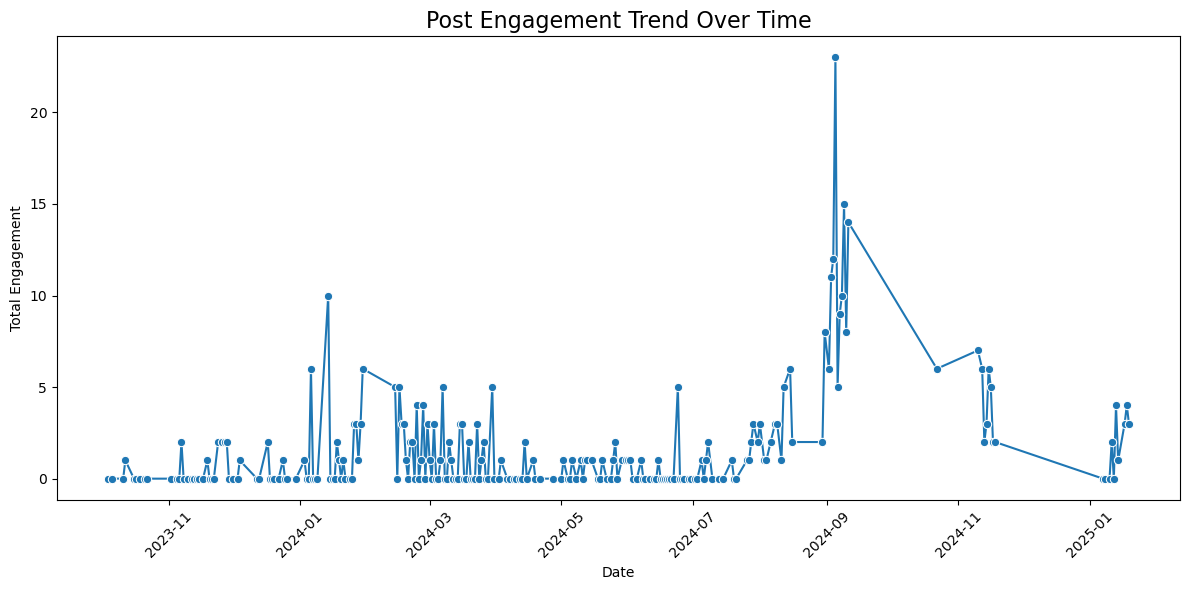

In [22]:
# Create engagement metric
df_post['Total Engagement'] = (
    df_post['Total post reactions'] + 
    df_post['Comments on posts'] + 
    df_post['Shares on posts']
)

# Ensure date is datetime
df_post['Post creation date'] = pd.to_datetime(df_post['Post creation date'])

# Group and plot line chart
engagement_trend = df_post.groupby('Post creation date')['Total Engagement'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=engagement_trend, x='Post creation date', y='Total Engagement', marker='o')
plt.title("Post Engagement Trend Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**__Plot a bar chart comparing different post types__**

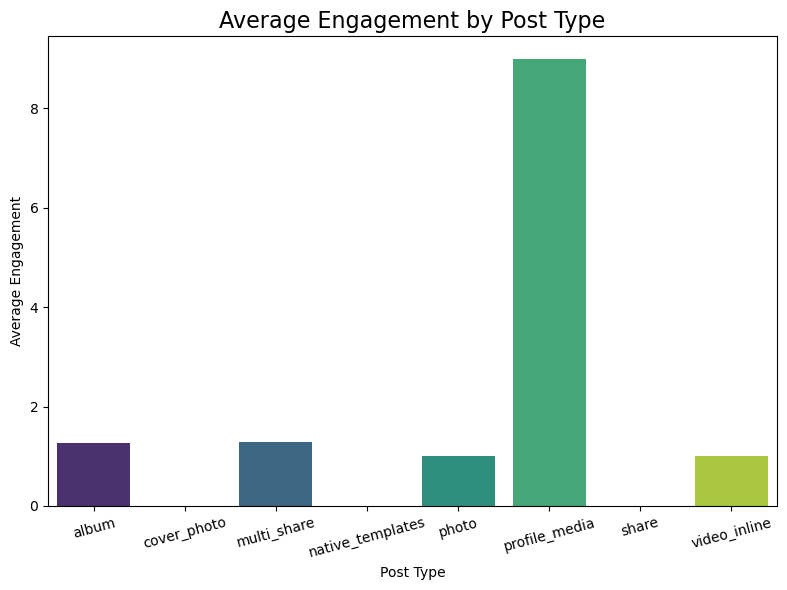

In [23]:
# Clean post type just in case
df_post['Post type'] = df_post['Post type'].str.strip()

# Group and average engagement
engagement_by_type = df_post.groupby('Post type')['Total Engagement'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=engagement_by_type, x='Post type', y='Total Engagement', palette='viridis')
plt.title("Average Engagement by Post Type", fontsize=16)
plt.xlabel("Post Type")
plt.ylabel("Average Engagement")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**__A function that predicts whether a post will perform well based on previous
engagement data__**

In [24]:
def predict_post_performance(post, historical_df, threshold_factor=1.2):
    # Calculate historical average engagement
    avg_engagement = historical_df["Total Engagement"].mean()
    print("Average Engagement:", avg_engagement)

    # Define threshold
    threshold = threshold_factor * avg_engagement

    # Compute engagement for the new post
    try:
        post_engagement = (
            float(post.get('Total post reactions', 0)) +
            float(post.get('Comments on posts', 0)) +
            float(post.get('Shares on posts', 0))
        )
    except ValueError:
        return "Invalid data in post"

    print("Post Engagement:", post_engagement)
    print("Threshold for High Performance:", threshold)

    # Compare against threshold
    if post_engagement >= threshold:
        return 'High Performing'
    else:
        return 'Average/Low Performing'


In [25]:
sample_post = {
    'Total post reactions': 150,
    'Comments on posts': 30,
    'Shares on posts': 20
}

# Replace `df_post` with your cleaned DataFrame if it's named differently
result = predict_post_performance(sample_post, df_post)
print("Prediction:", result)


Average Engagement: 1.1824104234527688
Post Engagement: 200.0
Threshold for High Performance: 1.4188925081433226
Prediction: High Performing
